# Problem 1

In class on 5 March 2019, we used Monte Carlo to fit a function to data with error bars in two
dimensions assuming a uniform random distribution of errors. Each of your was assigned a different
statistical error distribution (Sachi - Binominal, Carson - Possoin, Baylor - Gamma, Christine - Log
Normal, Hope - Gaussian, Sarah - Rayleigh). Your assignment is to create the following plots and
answer the questions below.

One one set of axis plot the following, <br>
(1) your noisy data with the error bars in x and y,<br>
(2) the
function you inputting to create the data, <br>
(3) the best fit curve from your Monte Carlo fitting, <br>
(4) a
shaded region showing the area between curves which and one standard deviation above and below
the best fit line. <br>
Make this plot for NMonteCarlo = 10;100;1000.

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [182]:
#Create a function
def f(x,a,b):
    '''Calculatees ax^3+bx'''
    return a*x**3+b*x
f_vector=np.vectorize(f)

In [354]:
#Create x values
x=20.0*(np.random.random(100)-0.5)

#noise level
ynoise=1000
y_noise=ynoise*(np.random.random(100)-0.5)
noisyy=f_vector(x,3,2)+y_noise

s=2

#error in x 2
errx=2

#error in y 500
erry=500

#Create errors with uniform distribution
xerr=errx*np.random.random(100)
yerr=erry*np.random.random(100)

#Create errors with binomial distribution
xerrb=errx*(1/100000)*np.random.binomial(1e5,0.5,100)
yerrb=erry*(1/100000)*np.random.binomial(1e5,0.5,100)

In [355]:
def MonteCarlo(N):
    '''Returns the a,b values of fits for the function'''
    a_arr=[]
    b_arr=[]
    for i in range(N):
        xi=x+((1/100000)*np.random.binomial(1e5,0.5)-0.5)*2.0*xerrb*s  #this is an array of x points
        yi=noisyy+((1/100000)*np.random.binomial(1e5,0.5)-0.5)*2.0*yerrb*s  #This is an array of ypoints

        popt,pcov=curve_fit(f,xi,yi)
        a,b=popt
        a_arr.append(a)
        b_arr.append(b)
        
    return a_arr,b_arr

def MonteCarlo_uniform(N):
    a_arr=[]
    b_arr=[]
    for i in range(N):
        count=i
        xi=x+(np.random.random()-0.5)*2.0*xerr*s
        yi=noisyy+(np.random.random()-0.5)*2.0*yerr*s

        popt,pcov=curve_fit(f,xi,yi)
        a,b=popt
        a_arr.append(a)
        b_arr.append(b)
        
    return a_arr,b_arr


In [356]:
a1,b1=MonteCarlo(10)
median_a1=np.median(a1)
stdv_a=np.std(a1)

median_b1=np.median(b1)
stdv_b1=np.std(b1)

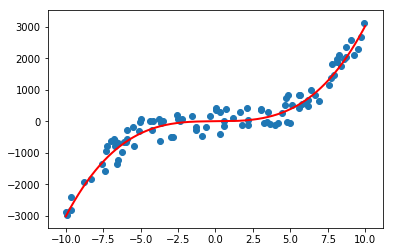

In [357]:
x_plot=np.linspace(-10,10,1000)
for i in range(len(a1)):
    plt.plot(x_plot,f_vector(x_plot,a1[i],b1[i]),lw=0.3,color='cyan',alpha=0.1)
plt.scatter(x,noisyy)
plt.plot(x_plot,f_vector(x_plot,3.0,2.0),lw=2,color='red')

In [358]:
def plot(N,x,ynoise):
    '''Create a plot for N montecarlo fits'''
    fig=plt.figure(figsize=(20,8))
    ax=fig.add_subplot(121)
    a,b=MonteCarlo(N)
    median_a=np.median(a)
    stdv_a=np.std(a)

    median_b=np.median(b)
    stdv_b=np.std(b)

    #Create an array in x direction
    xx=np.linspace(-12,12,100)

    #Calculate standard deviation of best fit line along x
    sd=np.std(f_vector(xx,median_a,median_b))
    
    #Curve above 1 stdev of best fit
    curve_up=f_vector(xx,median_a,median_b)+sd
    
    #Curve below 1 stdev of best fit
    curve_l=f_vector(xx,median_a,median_b)-sd
    ax.scatter(x,noisyy)
    
    labels=['Best Fit','Original Function']
    ax.errorbar(x,noisyy,xerr=xerr,fmt='o',ecolor='r',mfc='k',mec='k',ms=2)
    ax.errorbar(x,noisyy,yerr=yerr,fmt='o',ecolor='b',mfc='k',mec='k',ms=2)
    ax.plot(xx,f_vector(xx,3,2),c='cyan')
    ax.plot(xx,f_vector(xx,median_a,median_b),c='g')
    
    ax.fill_between(xx,curve_up,curve_l,color='grey',alpha=0.3)
    ax.set_title('N=%s Monte Carlo (Binomial Distribution Errors)'%N,size=20)
    ax.set_ylabel('y',size=16)
    ax.set_xlabel('x',size=16)
    ax.set_xticks(np.arange(-10,10,1))
    ax.set_yticks(np.arange(-6000,4000,500))
    ax.set_xlim(-11,11)
    ax.legend(labels)
    ax.set_ylim(-6000,4000)
    #########################################################################
    #Now we plot the uniform errors
    
    ax1=fig.add_subplot(122)
    a1,b1=MonteCarlo_uniform(N)
    median_a1=np.median(a1)
    stdv_a1=np.std(a1)

    median_b1=np.median(b1)
    stdv_b1=np.std(b1)

    #Calculate standard deviation of best fit line along x
    sd1=np.std(f_vector(xx,median_a1,median_b1))
    
    #Curve above 1 stdev of best fit
    curve_up1=f_vector(xx,median_a1,median_b1)+sd1
    
    #Curve below 1 stdev of best fit
    curve_l1=f_vector(xx,median_a1,median_b1)-sd1
    ax1.scatter(x,noisyy)
    
    ax1.errorbar(x,noisyy,xerr=xerrb,fmt='o',ecolor='r',mfc='k',mec='k',ms=2)
    ax1.errorbar(x,noisyy,yerr=yerrb,fmt='o',ecolor='b',mfc='k',mec='k',ms=2)
    ax1.plot(xx,f_vector(xx,3,2),c='cyan')
    ax1.plot(xx,f_vector(xx,median_a1,median_b1),c='g')
    
    ax1.fill_between(xx,curve_up1,curve_l1,color='grey',alpha=0.3)
    ax1.set_title('N=%s Monte Carlo (Uniform Distribution Errors)'%N,size=20)
    ax1.set_ylabel('y',size=16)
    ax1.set_xlabel('x',size=16)
    ax1.set_xticks(np.arange(-10,10,1))
    ax1.set_yticks(np.arange(-6000,4000,500))
    ax1.set_xlim(-11,11)
    ax1.set_ylim(-6000,4000)
    text="This plot compares the 2D fits generated with binomial distribution and uniform distribution. Grey area shows 1 standard deviation above and below the best fit"
    fig.text(0.1,-0.02,text,size=16)   
          
    ax1.legend(labels)
    #fig.text(0.12,0.01,text,size=15)
    plt.show()
    return fig

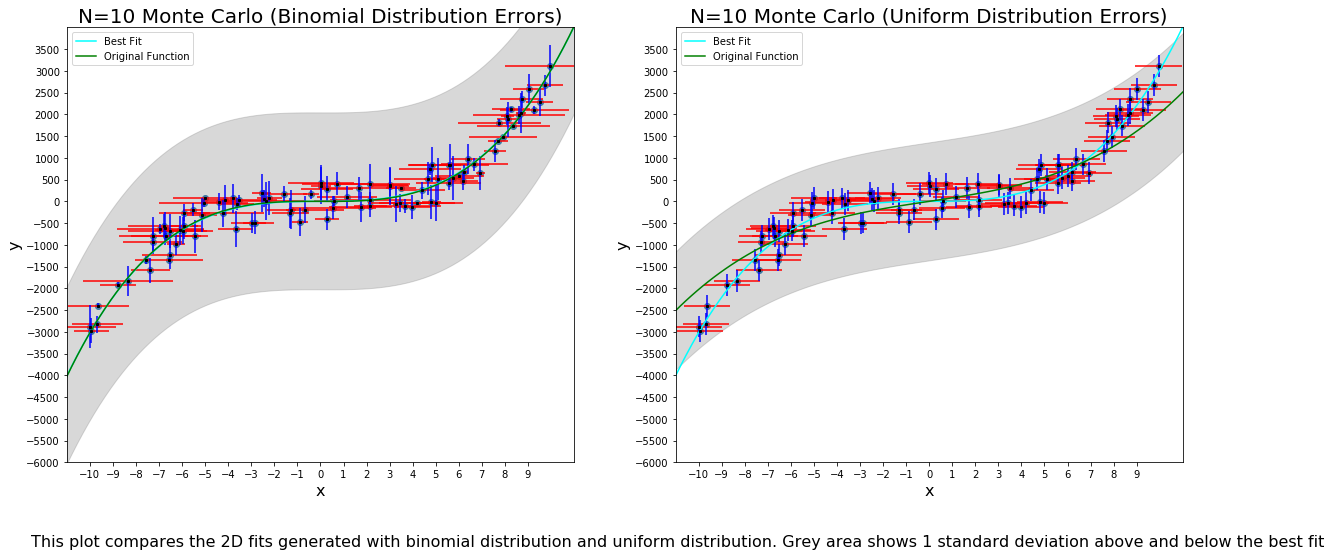

In [359]:
fig1=plot(10,x,noisyy)
fig1.savefig('Fit_N=10.pdf')

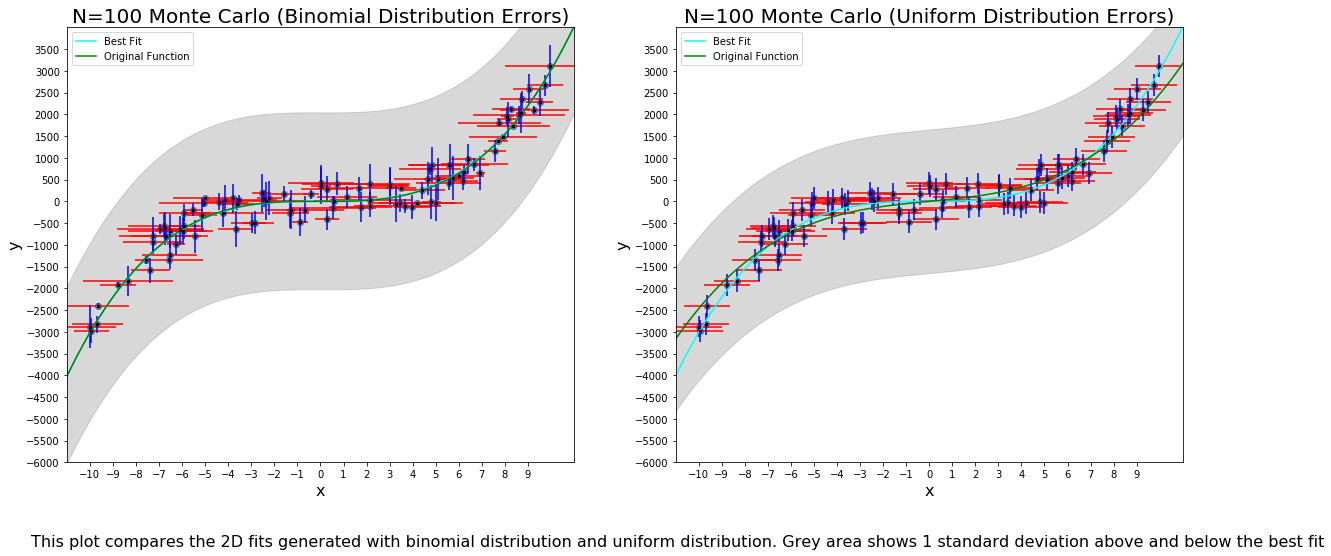

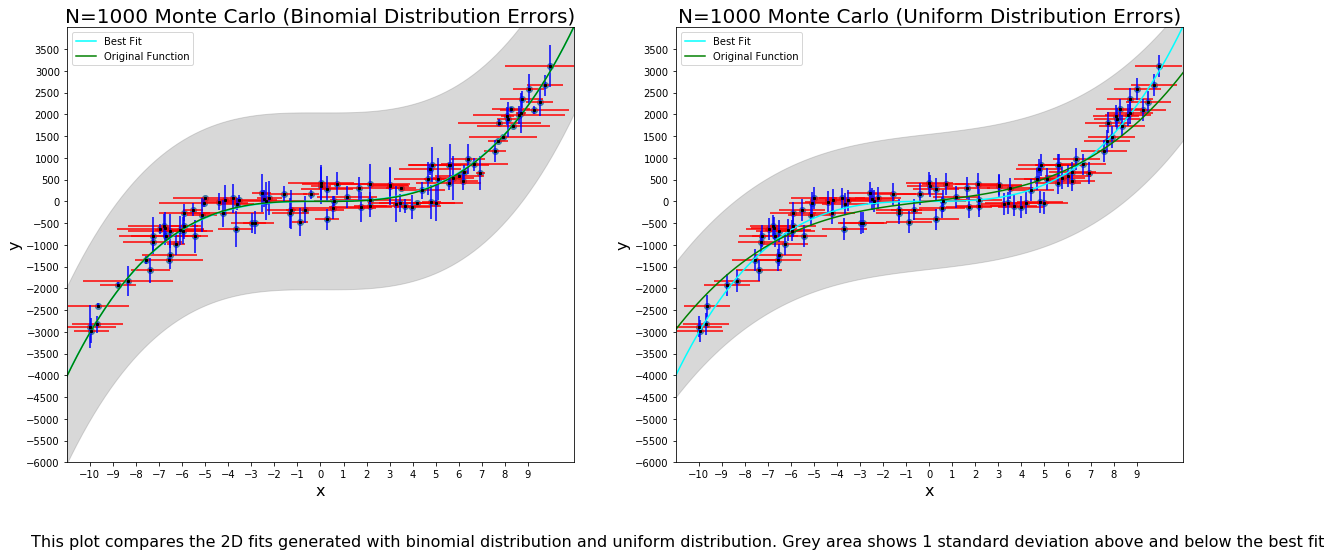

In [360]:
fig2=plot(100,x,noisyy)
fig2.savefig('fit_N=100.pdf')

fig3=plot(1000,x,noisyy)
fig3.savefig('fit_N=1000.pdf')

__How do your results for your given distribution compare to the ones you found in class for a uniform
distribution of errors?__<br>

- The fit generated with error bars that followed a binomial distribution is better compared to the uniform distribution.<br>
In the case of uniform distribution error bars are uniformly distributed. However, when binomial distribution is used<br>
error bars are populated based on that distribution. So error bar values are not very far off from each other.<br>





__Comment on how your results might change with the intrinsic scatter and size of the error bars in
your data. Did you need to populate the error bars to one standard deviation, two?__<br>

- Increased scatter makes it harder to get a good fit. So for large scatter we need to increase the monte carlo N.<br>

- Size of the error bars affects the best fit. The size of the error bars had to be populated to two standard deviation
  to get the best fit.

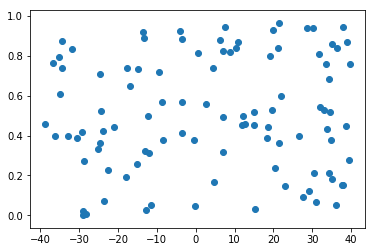

In [133]:
x2=np.random.random(100)
#*1.0*xerr
plt.scatter(x,x2)

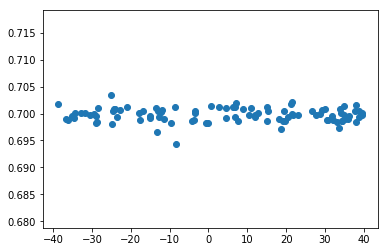

In [163]:
y1=np.random.binomial(100000,0.7,100)/100000
plt.scatter(x,y1)